In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
assets = ['FSS', 'F', 'GM']

In [3]:
# Assign Weights to the Stocks
weights = np.array([0.3333, 0.3334, 0.3334])

In [4]:
# Asset file with Beginning prices being the actual price and ending prices being the forecasted price
from google.colab import files
uploaded = files.upload()

Saving Prediction_Prices_FSS_F_GM.csv to Prediction_Prices_FSS_F_GM.csv


In [5]:
df = pd.read_csv("Prediction_Prices_FSS_F_GM.csv")
df

,FSS,F,GM
0,45.558990,4.385446,12.585005
1,44.983000,4.441066,12.869732
2,44.554810,4.588023,13.395314
3,44.266846,4.726831,13.902759
4,44.096810,4.780926,14.156715
...,...,...,...
65,53.331085,7.167092,16.624655
66,53.409107,7.038715,15.932906
67,53.452282,6.994274,15.429231
68,53.497320,7.084479,15.420482


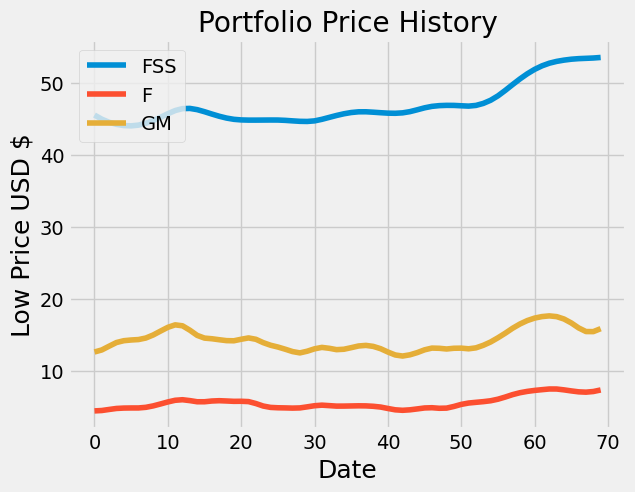

In [6]:
# Visually show the Stock/Portfolio
title = 'Portfolio Price History'

# Get the Stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Low Price USD $', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [7]:
#Show the daily simple return
returns = df.pct_change()
returns

,FSS,F,GM
0,NaN,NaN,NaN
1,-0.012643,0.012683,0.022624
2,-0.009519,0.033090,0.040839
3,-0.006463,0.030254,0.037882
4,-0.003841,0.011444,0.018267
...,...,...,...
65,0.002428,-0.020073,-0.032117
66,0.001463,-0.017912,-0.041610
67,0.000808,-0.006314,-0.031612
68,0.000843,0.012897,-0.000567


In [8]:
#Create & Show the annualized covariance Matrix
cov_matrix_cond = returns.cov() * 70
cov_matrix_cond

,FSS,F,GM
FSS,0.002504,0.004385,0.004592
F,0.004385,0.047214,0.034758
GM,0.004592,0.034758,0.039827


In [9]:
#calculate the portfolio variance
port_var = np.dot(weights.T, np.dot(cov_matrix_cond, weights))
port_var

0.019675258471026774

In [10]:
#Calculate the portfolio Volatility i.e. STD DEV
port_vol = np.sqrt(port_var)
port_vol

0.14026852273773605

In [11]:
#Calculate the annual Portfolio return
port_simple_70days = np.sum(returns.mean() * weights) * 70
port_simple_70days

0.32017870109274166

In [12]:
#Showing the expected annual return, volatility and variance
pct_var = str(round(port_var, 2) * 70) + '%'
pct_risk = str(round(port_vol, 2) * 70) + '%'
pct_rtn = str(round(port_simple_70days, 2) * 70) + '%'

print('Expected Timely Return: ' + pct_rtn)
print('Risk/Volatility: ' + pct_risk)
print('Variance: ' + pct_var)

Expected Timely Return: 22.400000000000002%
Risk/Volatility: 9.8%
Variance: 1.4000000000000001%


In [13]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 936.8 kB/s eta 0:00:00


In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [15]:
#Portfolio Optimization
#Calculate the Expected Returns
#Calculate the annualized Sample Covariance Matrix of Asset Returns
average = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)

#Optimize for Maximum Sharpe Ratio
ef_line = EfficientFrontier(average, s)
weights = ef_line.max_sharpe()
cleaned_weights = ef_line.clean_weights()
print(cleaned_weights)
ef_line.portfolio_performance(verbose = True)

OrderedDict([('FSS', 0.57181), ('F', 0.42819), ('GM', 0.0)])
Expected annual return: 278.5%
Annual volatility: 20.5%
Sharpe Ratio: 13.52


(2.7849832709391116, 0.2045497647902675, 13.517411148207145)

In [16]:
#Get the discrete allocation for each pair of Stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 1000)

allocation , leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'FSS': 11, 'F': 56}
Funds Remaining: $1.97


In [17]:
buy_FSS = 52.61 * 11
sell_FSS = 62.99 * 11
buy_F = 11.4 * 56
sell_F = 14.87 * 56
funds_remaining = 1.97
approximate_gain = (sell_FSS + sell_F) - (buy_FSS + buy_F) + funds_remaining
print('Approximate Gain: $', approximate_gain)

Approximate Gain: $ 310.4699999999998


In [18]:
buy_FSS = 52.61 * 11
buy_F = 11.4 * 56
act_sell_FSS = 62.99 * 11
act_sell_F = 14.79 * 56
funds_remaining = 1.97
actual_gain = (act_sell_FSS + act_sell_F) - (buy_FSS + buy_F) + funds_remaining
print('Actual Gain: $', actual_gain)

Actual Gain: $ 305.99


In [19]:
portfolio_efficiency = actual_gain / approximate_gain
print("Portfolio Efficiency: ", portfolio_efficiency)

Portfolio Efficiency:  0.9855702644377885


In [20]:
contribution_margin = 1000
ROI = (approximate_gain / contribution_margin) * 100
print("Return on Investment: ", ROI)

Return on Investment:  31.04699999999998
